In [1]:
%pylab inline

from __future__ import print_function
from matplotlib import pyplot as plt

import math 
import cvxopt

import numpy as np 

import scipy
from scipy import special

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Omega(n, t):
    return scipy.special.gamma(n / 2.0) * (2.0 / t) ** (n / 2.0 - 1) * scipy.special.jv(n / 2.0 - 1, t)

def calculate_target(z_0, z_2, alpha_lower, V):
    return z_0 + z_2 * float(alpha_lower) / float(V)

def calculate_constraint(t, z_0, z_1, z_2, n, r):
    return z_0 + z_1 * Omega(n, t) + z_2 * Omega(n, r * t)

In [3]:
def simple_plot(func, t_from, t_to, t_step):
    t_values = np.arange(t_from, t_to, t_step)
    values = map(func, t_values)

    plt.plot(t_values, values)
    plt.show()

In [4]:
r = 2 ** (-0.5)

n_to_alpha_lower = {
    12: 1428,
    14: 8192,
    16: 29700,
    18: 134420,
    20: 635206,
    22: 2983344,
    24: 13929188,
}

In [5]:
def get_chi_m_lower_estimate(
    n, 
    alpha_lower, 
    V,
    constraint_from,
    constraint_to,
    constraint_step,
):
    A = [
        [0.0, -1.0, 0.0], 
        [-1.0, -1.0, -1.0] 
    ]

    b = [0.0, -1.0]

    for t in np.arange(constraint_from, constraint_to, constraint_step):
        A.append([
            -1.0, -Omega(n, t), -Omega(n, r * t)
        ])
        b.append(0.0)

    A = cvxopt.matrix(A).trans()
    b = cvxopt.matrix(b)
    c = cvxopt.matrix([1.0, 0.0, alpha_lower / float(V)])
    
    cvxopt.solvers.options['show_progress'] = False
    
    opt_z_0, opt_z_1, opt_z_2 = cvxopt.solvers.lp(c, A, b)['x']

    target = calculate_target(opt_z_0, opt_z_2, alpha_lower, V)
    chi_lower = int(math.ceil(1.0 / target))
        
    return chi_lower, opt_z_0, opt_z_1, opt_z_2

In [8]:
constraint_from = 0.005 
constraint_to = 200 
constraint_step = 0.005

for n in range(12, 26, 2):
    V = scipy.special.binom(n, n / 2.0) * 2.0 ** (n / 2.0)
    alpha_lower = n_to_alpha_lower[n]
    
    chi_lower, opt_z_0, opt_z_1, opt_z_2 = get_chi_m_lower_estimate(
        n, 
        alpha_lower, 
        V,
        constraint_from,
        constraint_to, 
        constraint_step,
    )    
        
    print('n = {0}\talpha_lower = {1}\tchi_lower = {2}\toptimal (z_0, z_1, z_2) = {3}'.format(
        n, 
        alpha_lower, 
        chi_lower,
        (opt_z_0, opt_z_1, opt_z_2), 
    ))

n = 12	alpha_lower = 1428	chi_lower = 253	optimal (z_0, z_1, z_2) = (0.0007422752513865761, 0.8656882209698444, 0.13356950378192048)
n = 14	alpha_lower = 8192	chi_lower = 507	optimal (z_0, z_1, z_2) = (0.0003670104250845595, 0.9133893424317526, 0.08624364714346593)
n = 16	alpha_lower = 29700	chi_lower = 1403	optimal (z_0, z_1, z_2) = (0.00018443032169116318, 0.9411683542212048, 0.05864721552630307)
n = 18	alpha_lower = 134420	chi_lower = 3169	optimal (z_0, z_1, z_2) = (9.378729192488417e-05, 0.9588194474287898, 0.04108676530249762)
n = 20	alpha_lower = 635206	chi_lower = 6812	optimal (z_0, z_1, z_2) = (4.8179587328267876e-05, 0.9705729004710861, 0.029378919947985062)
n = 22	alpha_lower = 2983344	chi_lower = 14493	optimal (z_0, z_1, z_2) = (2.4952751772668898e-05, 0.9786428915977613, 0.02133215590882985)
n = 24	alpha_lower = 13929188	chi_lower = 30566	optimal (z_0, z_1, z_2) = (1.3000036740964054e-05, 0.9843084462964303, 0.015678555010238845)


### Visualizing the constraints

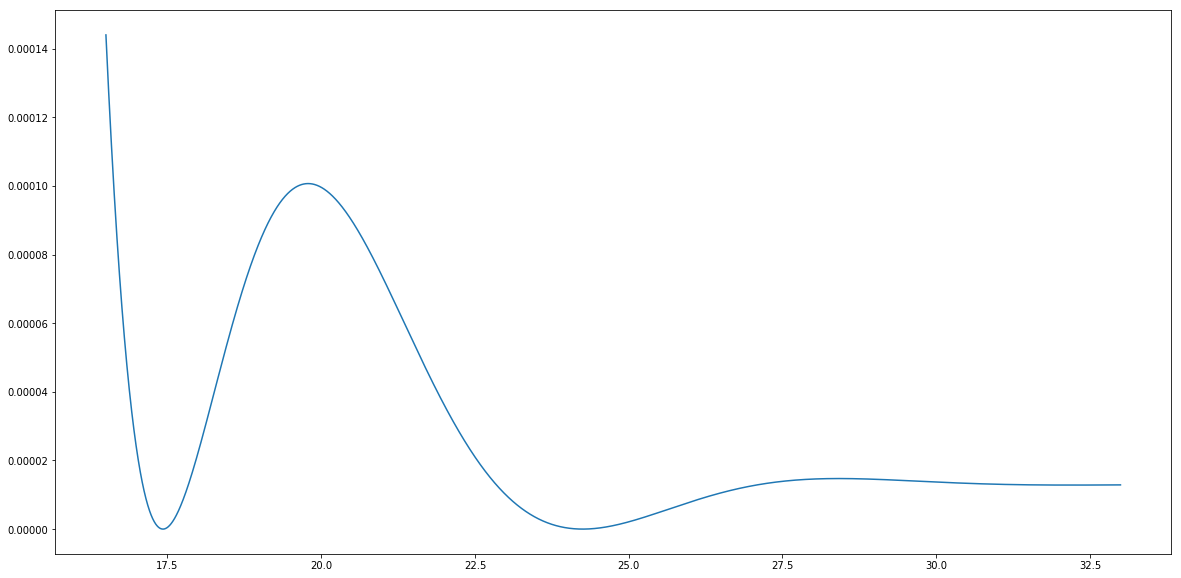

In [7]:
plt.figure(figsize=(20, 10))

simple_plot(
    lambda t: calculate_constraint(
        t=t, 
        z_0=1.3000036740964054e-05, 
        z_1=0.9843084462964303,
        z_2=0.015678555010238845, 
        n=24, 
        r=r
    ),
    t_from=16.5,
    t_to=33, 
    t_step=0.005,
)